<center>
<img src="https://avatars.mds.yandex.net/i?id=08831819d2b500822a90327ea7aee923ef8a5322-9154878-images-thumbs&n=13" height="250">

# Андан на экономе: домашнее задание 3
</center>


> Bicycle bicycle bicycle  <br> I want to ride my bicycle <br> I want to ride my bike <br> I want to ride my bicycle <br>  I want to ride it where I like

$\qquad$ $\qquad$ $\qquad$ $\qquad$  **[Bicycle Race (Queen)](https://www.youtube.com/watch?v=r2lT4oE4DxE)**

**ФИО:** Иванов Андрей Александрович

## Общая информация


__Дата выдачи:__ 29.02.2024

__Мягкий дедлайн:__ 23:59MSK 19.05.2024

__Жесткий дедлайн:__ 23:59MSK 26.05.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

# Спрос на велосипеды

В этой домашке мы будем работать с данными о спросе на велосипеды. Мы научимся его предсказывать.

In [2]:
df = pd.read_csv('https://github.com/hse-econ-data-science/andan2024/raw/main/hw/data/bikes_rent.csv')
print(df.shape)
df.head( )

(731, 13)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


__Описание переменных:__

* `season`  1 - весна, 2 - лето, 3 - осень, 4 - зима
* `yr`  0 - 2011, 1 - 2012
* `mnth`  от 1 до 12
* `holiday`  0 - нет праздника, 1 - есть праздник
* `weekday`  от 0 до 6
* `workingday`  0 - нерабочий день, 1 - рабочий день
* `weathersit`  оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* `temp`  температура в Цельсиях
* `atemp`  температура по ощущениям в Цельсиях
* `hum`  влажность
* `windspeed(mph)`  скорость ветра в милях в час
* `windspeed(ms)`  скорость ветра в метрах в секунду
* `cnt`  количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

In [3]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):
    """
        Рисует картинку для прогнозов регрессии
    """

    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.scatter(y_test, y_test_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    pass

## 1. EDA

__а) [5 баллов]__ Проверьте, есть ли в данных пропуски

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64


__б) [5 баллов]__ Составьте список из категориальных переменных и список из действительных переменных.

In [5]:
var_cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

var_real = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

target = 'cnt'

__в) [5 баллов]__ Нарисуйте гистограмму для целевого признака. Что можете сказать о его хвосте? Надо ли предпринять какие-нибудь манипуляции, связанные с борьбой с выбросами?

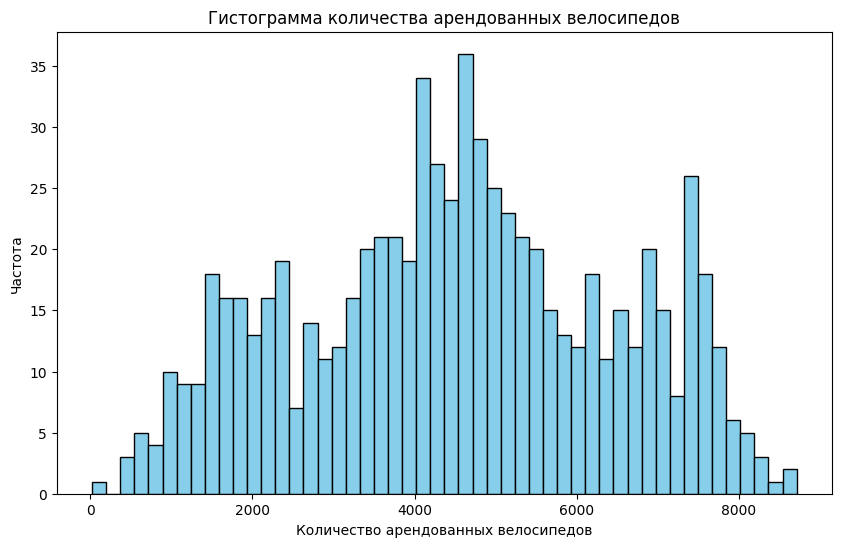

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['cnt'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Количество арендованных велосипедов')
plt.ylabel('Частота')
plt.title('Гистограмма количества арендованных велосипедов')
plt.show()

__Ответ:__  Хвост, кажется, достаточно короткий, и выбросов мало. Их достаточно мало, чтобы с ними бороться

__г) [5 баллов]__ Давайте посмотрим на то, как переменные коррелируют с таргетом. Для этого постройте соответствующую облака рассеивания.

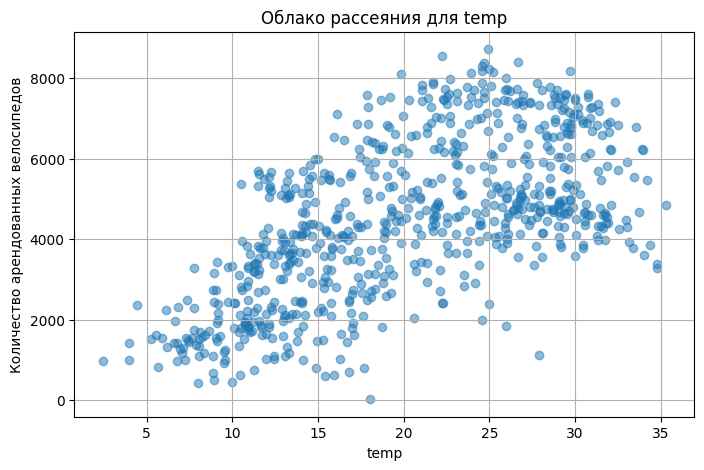

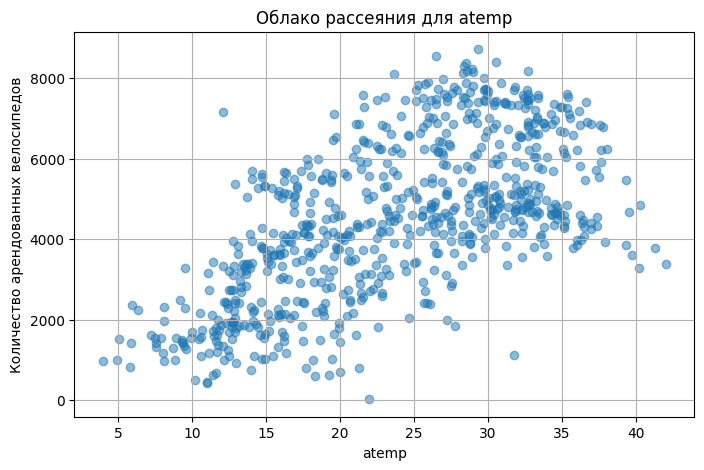

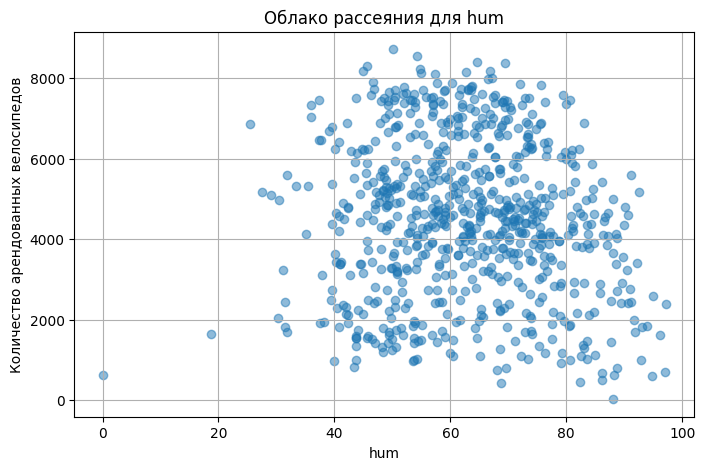

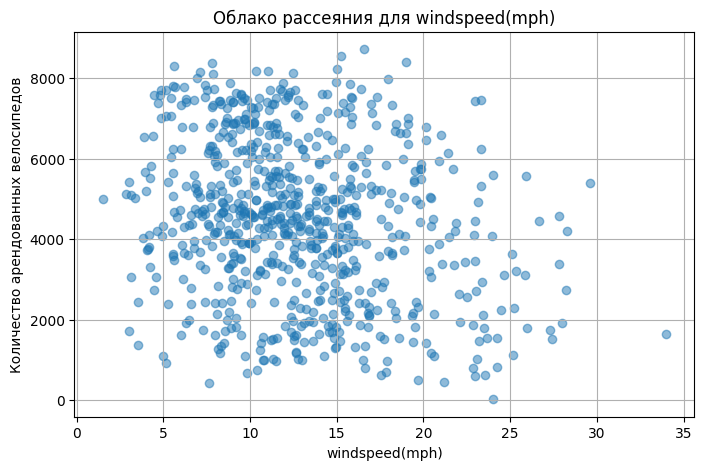

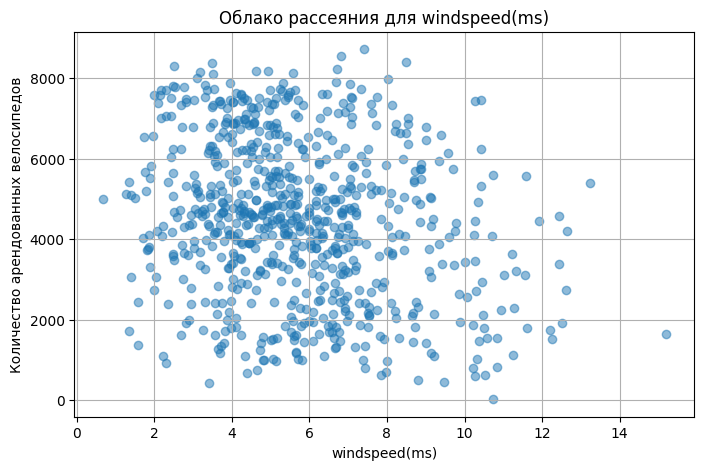

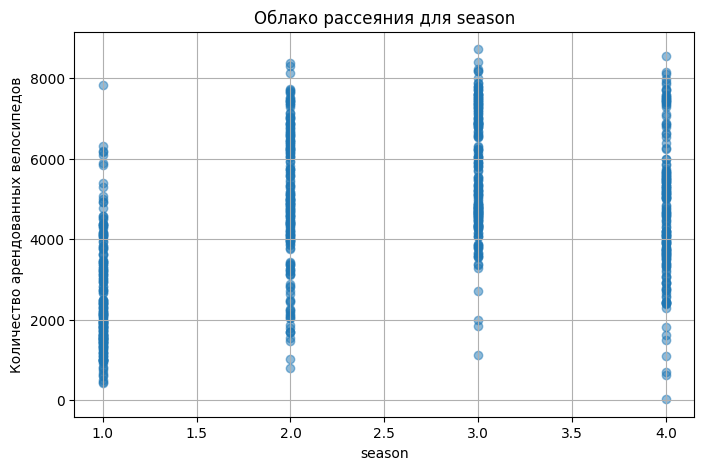

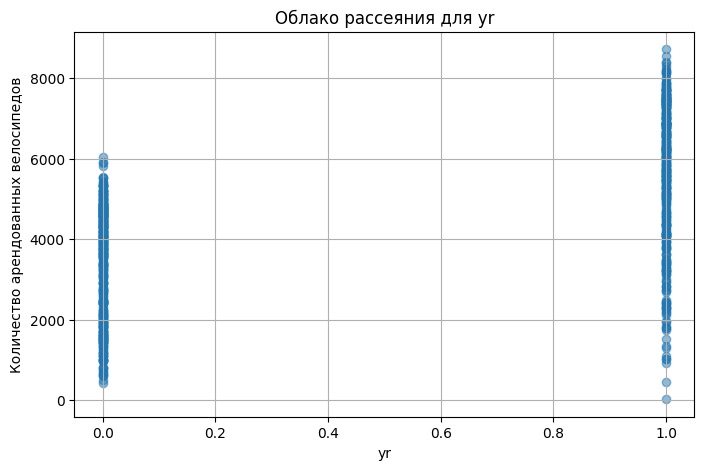

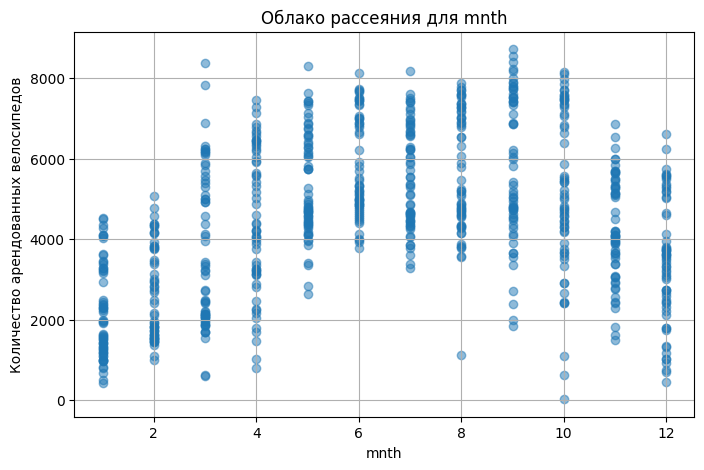

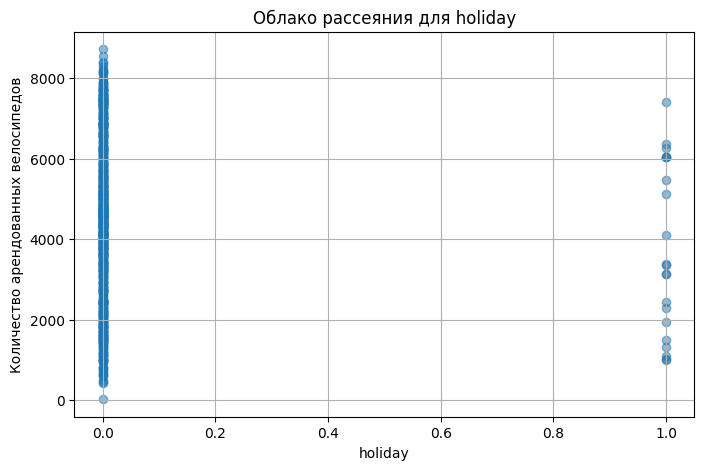

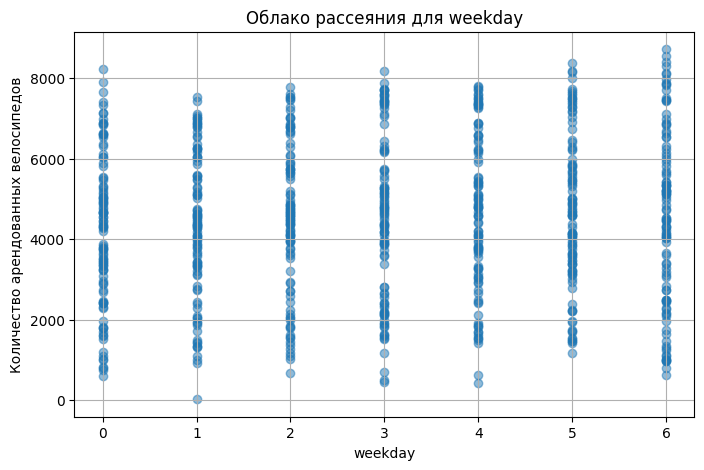

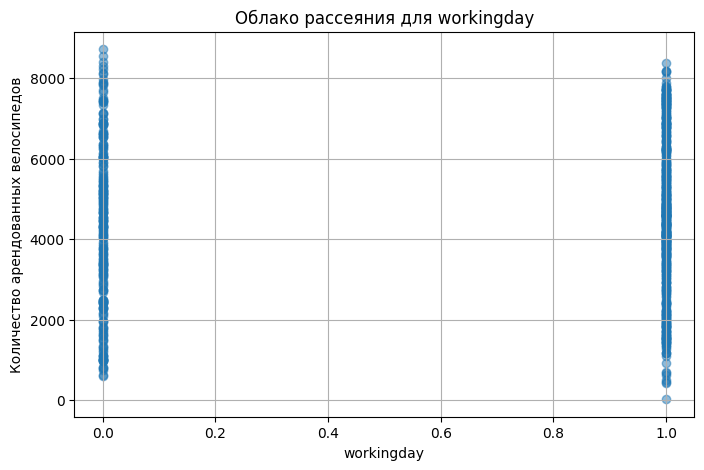

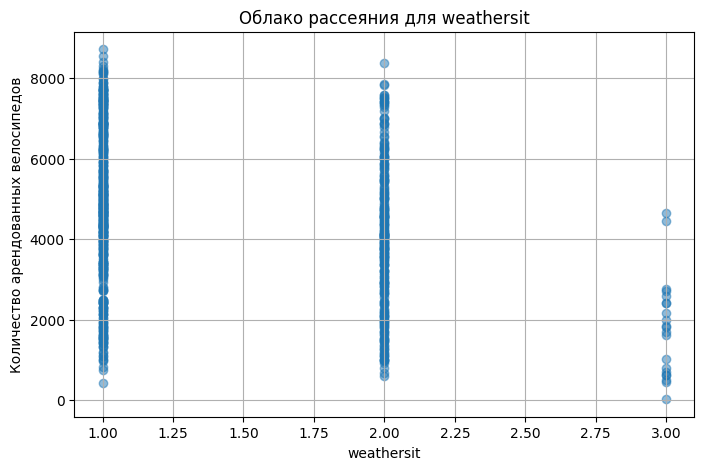

In [7]:
features = var_real + var_cat

for feature in features:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[feature], df['cnt'], alpha=0.5)
    plt.title('Облако рассеяния для {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Количество арендованных велосипедов')
    plt.grid(True)
    plt.show()

__д) [5 баллов]__ Каков характер зависимости числа прокатов от месяца? От каких признаков спрос зависит линейно?

__Ответ:__  с апреля по ноябрь спрос больше, чем в остальные месяцы.

Линейная зависимость наблюдается у температуры (реальной и по ощущениям), а у ветра и влажности, как мне кажется, линейной зависимости нет.

__е) [5 баллов]__ Постройте гистограммы для всех непрерывных переменных. Что можете сказать о выбросах?

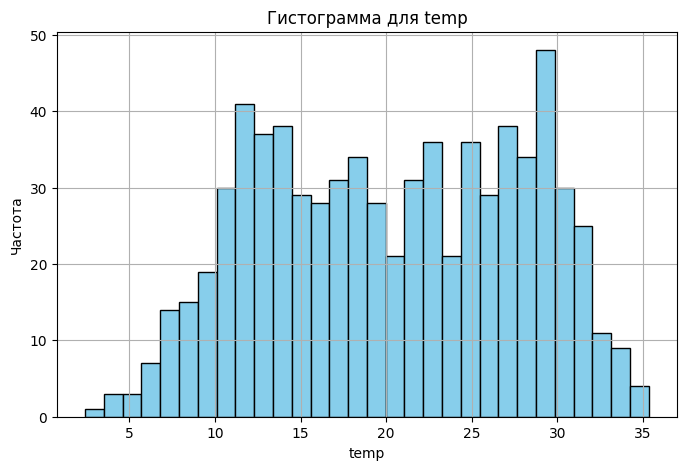

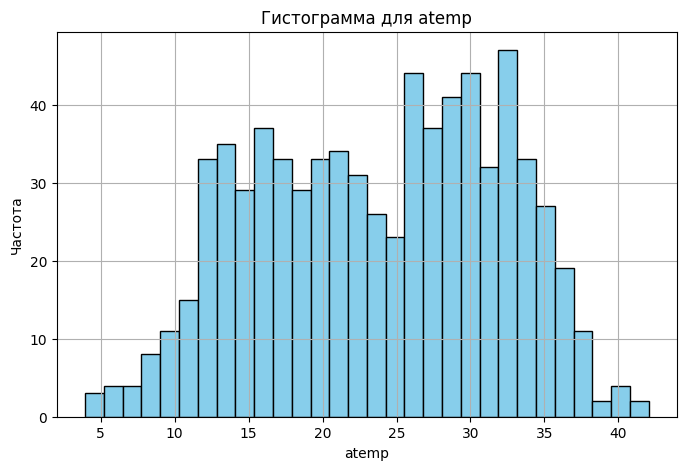

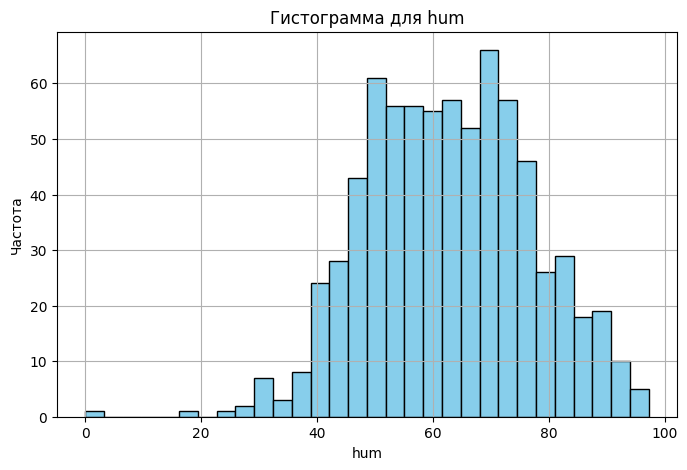

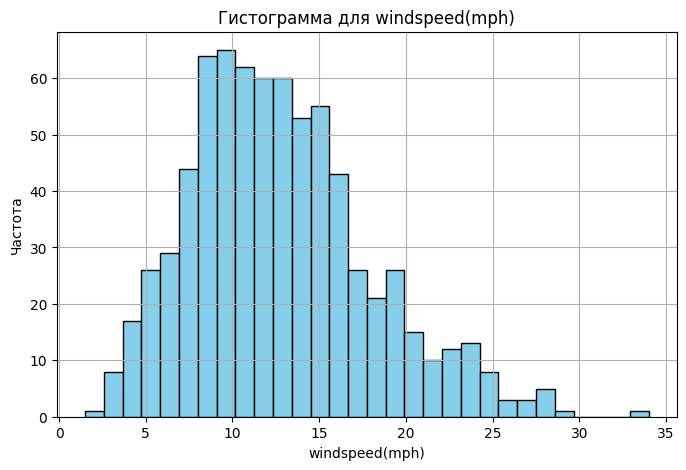

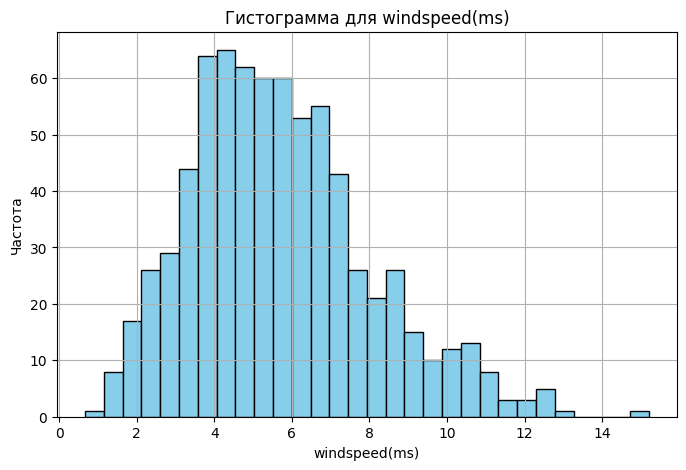

In [8]:
for feature in var_real:
    plt.figure(figsize=(8, 5))
    plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.title('Гистограмма для {}'.format(feature))
    plt.grid(True)
    plt.show()

У данных по температурам явных выбросов нет, а у влажности и скорости ветра есть по несколько выбросов.

__ж) [5 баллов]__ Постройте между непрерывными признаками корреляционную матрицу. Нарисуйте её. Какие признаки, скорее всего, неинформативны? Почему они на ваш взгляд такие?

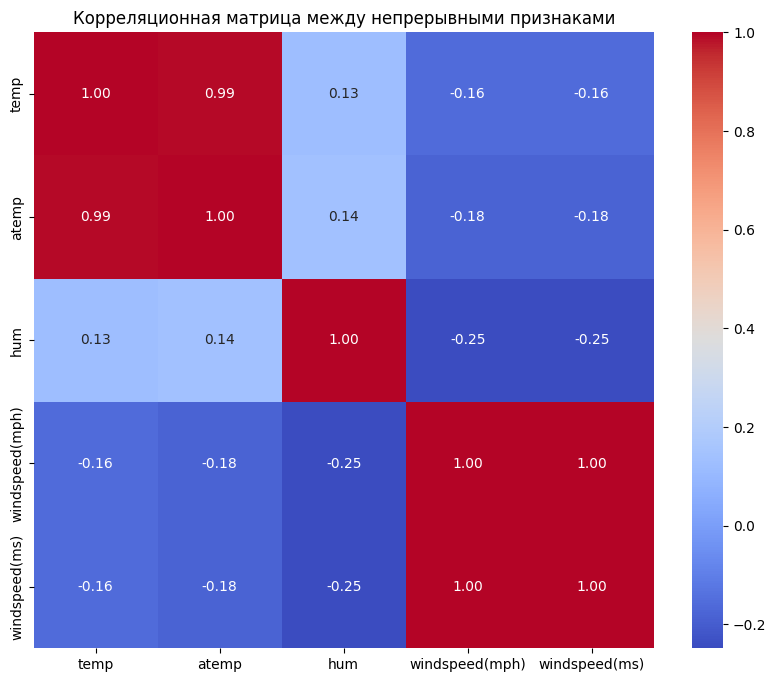

In [9]:
corr_matrix = df[var_real].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица между непрерывными признаками')
plt.show()

__Ответ:__ признаки температура по ощущениям и реальная температура, по сути, очень близки), и можно сказать, что один из них неинформативен. Аналогично с ветрами (но они вообще одно и то же, просто в разных измерениях.

Поэтому надо по одному из них исключить. Я бы выбрал температуру реальную(хотя она менее объективная, но для человека она более правдивая и лучше показывает состояние на улице, так как она учитывает ветер, облачности и т.д.) и скорость в милях в час(мы русские, мы не знаем что такое мили)

__з) [5 баллов]__ Постройте для всех категориальных переменных _countplot_. Что интересного вы видите в распределеии этих признаков?  Встречаются ли слишком обширные категории, в которых очень маленькие части нам придётся объединять в категорию "другое"?

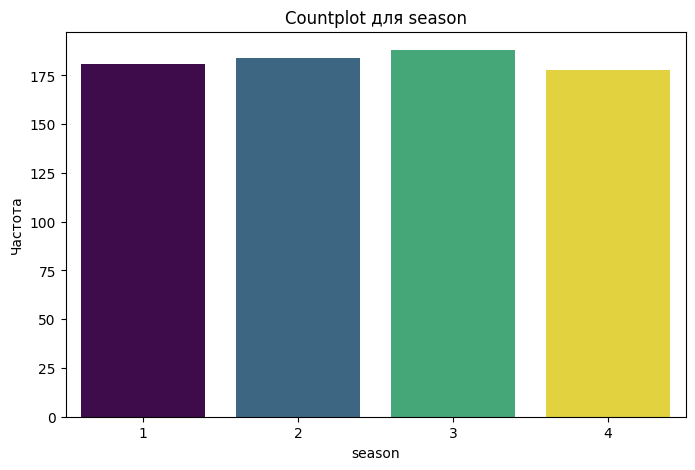

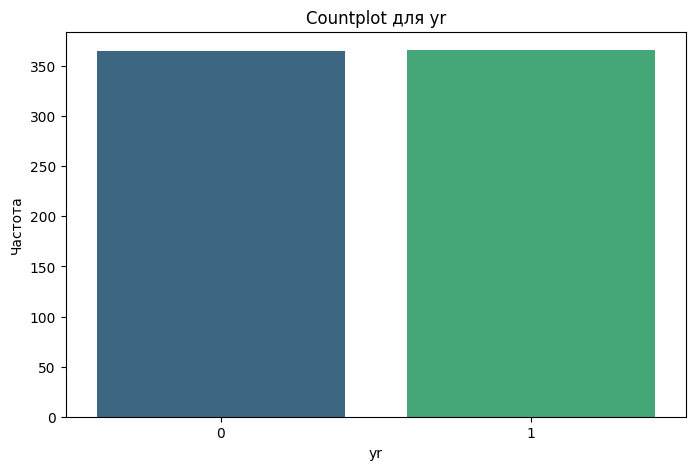

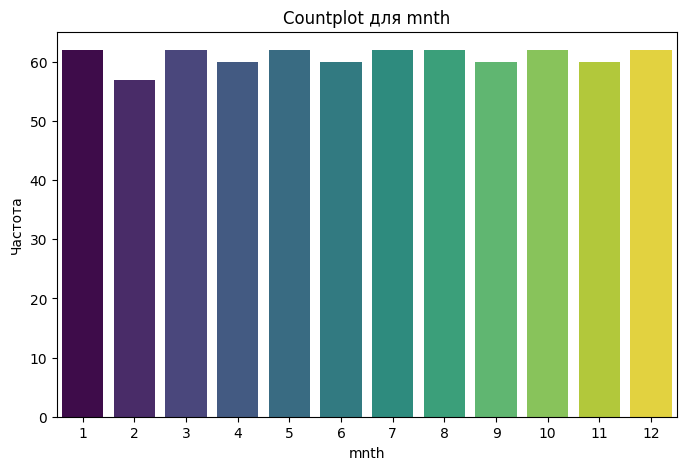

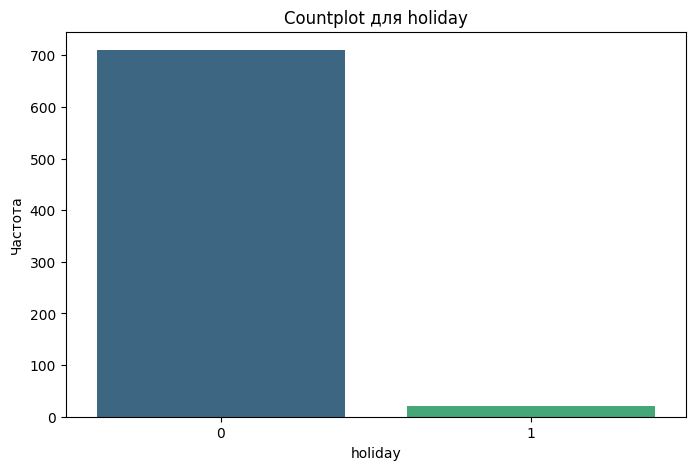

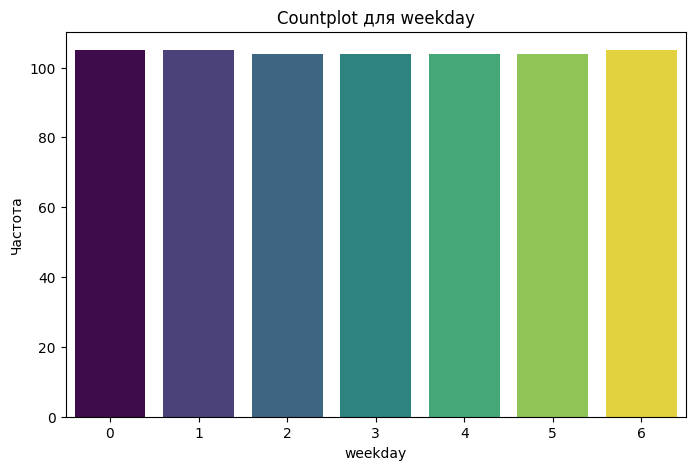

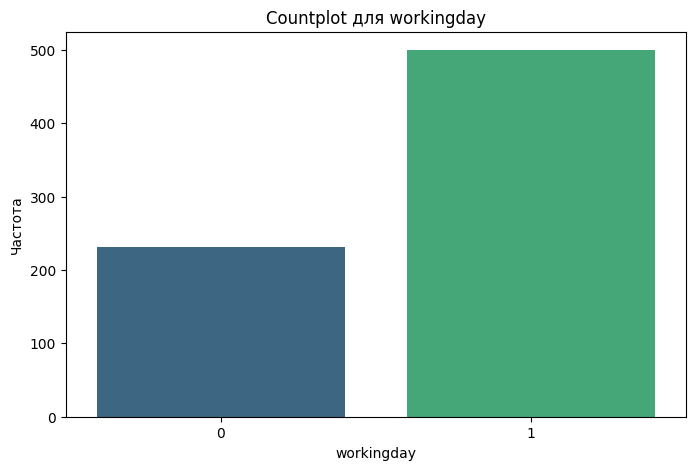

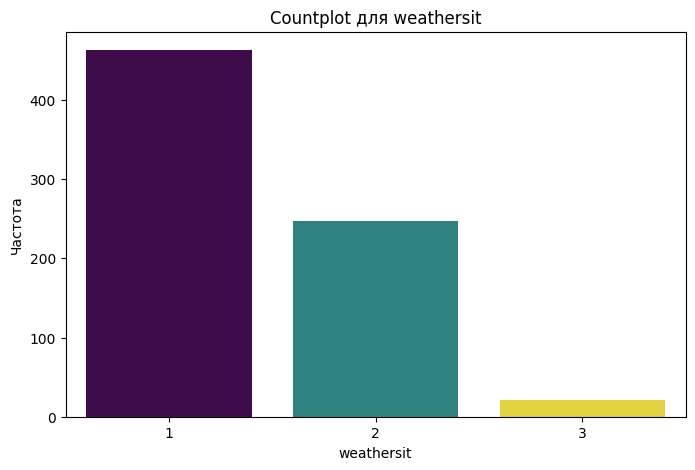

In [10]:
for feature in var_cat:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, hue=feature, palette='viridis', legend=False)
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.title('Countplot для {}'.format(feature))
    plt.show()

__Ответ:__  для сезона, года, месяца, дня недели и рабочий/нет день все логично и не надо ничего разделять. А вот с погодой сложнее: 4 у нас вообще нет(хотя в условии она заявлена), 3 очень маленькая, и 3,4 можно выделить в другое, хотя ничего по сути не изменится. Объединять 3 с 2 не хочется, потому что уж слишком разные это состояния погоды.

__и) [5 баллов]__  Сделайте OHE-кодирование. Сколько свежих OHE-признаков у нас появилось?

In [11]:
df_encoded = pd.get_dummies(df, columns=var_cat)

num_new_features = df_encoded.shape[1] - df.shape[1]

print("Количество новых OHE-признаков:", num_new_features)

Количество новых OHE-признаков: 25


In [12]:
df = df_encoded

__к) [5 баллов]__   Некоторые из наших переменных могут вносить в спрос на велики квадратичный вклад. Например, температура.

Сначала, когда температура возрастает, люди выходят кататься охотнее, а потом, когда становится жарко, спрос резко падает. Так возникает параболическая зависимость.

Создайте для каждой действительной переменной из данных дополнительную переменную: её квадрат.

In [13]:
for feature in var_real:
    df[f'{feature}_squared'] = df[feature] ** 2
df.head()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt,season_1,season_2,season_3,season_4,...,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,temp_squared,atemp_squared,hum_squared,windspeed(mph)_squared,windspeed(ms)_squared
0,14.110847,18.18125,80.5833,10.749882,4.805490,985,1,0,0,0,...,1,0,0,1,0,199.116003,330.557852,6493.668239,115.559963,23.092738
1,14.902598,17.68695,69.6087,16.652113,7.443949,801,1,0,0,0,...,1,0,0,1,0,222.087427,312.828200,4845.371116,277.292867,55.412371
2,8.050924,9.47025,43.7273,16.636703,7.437060,1349,1,0,0,0,...,0,1,1,0,0,64.817377,89.685635,1912.076765,276.779887,55.309860
3,8.200000,10.60610,59.0435,10.739832,4.800998,1562,1,0,0,0,...,0,1,1,0,0,67.240000,112.489357,3486.134892,115.343991,23.049580
4,9.305237,11.46350,43.6957,12.522300,5.597810,1600,1,0,0,0,...,0,1,1,0,0,86.587436,131.411832,1909.314198,156.807997,31.335472


__л) [5 баллов]__  Попробуйте придумать ещё какую-нибудь новую фичу (дополнительную переменную) для прогнозирования. Опишите какая за вашей фичёй стоит интуиция и почему это должно сработать при моделировании.

Я не понял, надо сделать что-то придумывать нового из того, что есть в датасете, чтобы был новый стоблец, или же надо придумать что-то, по чему нет данных.

Для 2 варианта можно смотреть на наличие перекрытий дорог, так как часто это увеличивает спрос на велосипеды: есди, например, перекрыли центр из-за репетиции парада, а ехать как-то надо, то СИМ, в том числе велосипед, будут спасением. Еще можно смотреть на наличие крупных мероприятий (больше, например, 20к человек), это тоже увеличивает спрос на велосипеды (реальный пример: https://t.me/whooshbike/379)

Для 1: можно усложнить параметр месяца для более правильного значения сезонности, взяв синус или что-то в этом духе. Еще можно добавить такой признак, как предпраздничный/предвыходной день или нет, сделав признак 'workingday' более точным.

## 2. Обучение модели

__а) [10 баллов]__  Разбейте выборку на тренировочную и тестовую.

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['cnt']) 
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Размер тренировочной выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер тренировочной выборки: 511
Размер тестовой выборки: 220


__б) [10 баллов]__ Возьмите RMSE в качестве метрики качества. Для этого нужно написать свою функцию. Постройте наивный прогноз (среднее) и найдите для него RMSE.

In [15]:
naive_prediction = np.mean(y_train)
naive_predictions = np.full_like(y_test, naive_prediction)

def rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse
naive_rmse = rmse(y_test, naive_predictions)

print("RMSE для наивного прогноза (среднее):", naive_rmse)

RMSE для наивного прогноза (среднее): 1903.0870065620895


__в) [5 баллов]__ Запустите код с разбиением выборки на тренировочную и тестовую, подсчётом наивного прогноза и RMSE по нему несколько раз. НЕ НАДО НИЧЕГО КОПИРОВАТЬ. ПРОСТО ПЕРЕЗАПУСТИТЕ КОД ТРИ РАЗА. Меняется ли RMSE? Почему оно меняется? К чему плохому это может привести при обучении? Как это обычно исправляют?

__Ответ:__  Да, RMSE меняется. Так происходит потому что у нас всегда разные данные, а значит всегда разные средние, и всегда разные прогнозы. И точность всегда будет разной, и невозможно сделать хорошую модель.

Обычно это исправляют добавлением random_state при разделении выборок.

__г) [10 баллов]__ Оцените линейную регрессию. Насколько удалось улучшить качество прогнозирования в сравнении с наивным прогнозом?  Визуализируйте прогнозы функцией `plot_yreal_ypred`.

Что вы видите на этой визуализации? Проинтерпретируйте картинку.

__Ответ:__ RMSE сильно снизился относительно наивного прогноза, примерно в 2.5 раза.

Я вижу, что на треничровной выборке прогнозы ближе к верным, чем на тестовой.

RMSE для линейной регрессии: 806.5250390684763


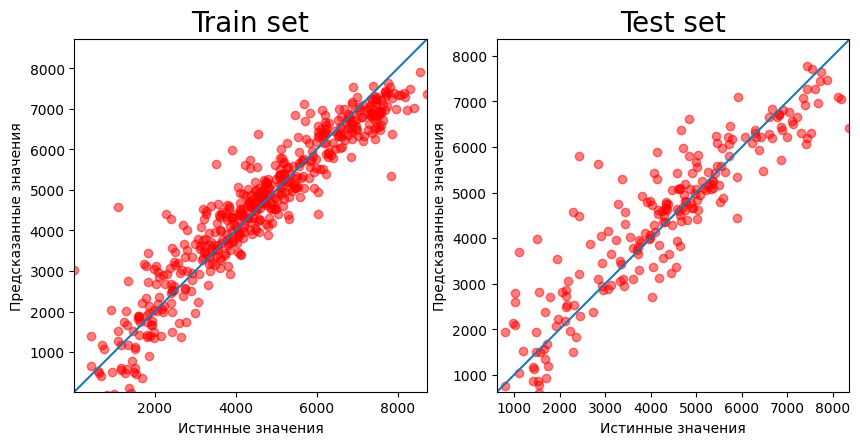

In [16]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_test_pred = linear_reg_model.predict(X_test)
rmse_linear_reg = rmse(y_test, y_test_pred)

print("RMSE для линейной регрессии:", rmse_linear_reg)

plot_yreal_ypred(y_test, y_train, y_test_pred, linear_reg_model.predict(X_train))


__д) [10 баллов]__ Какими получились значения перед коэффициентами у вашей модели?  Как думаете, почему такое произошло?

__Ответ:__  Все коэффициенты очень большие. Очевидно, произошло переобучение. Также что-то можно объяснить тем, что у нас много коллинеарных признаков, которые очень похожи и имеют одинаковый эффект, а мы от них не избавлились.

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
coefficients = linear_reg_model.coef_
coefficients_df = pd.DataFrame({'Признак': X.columns, 'Коэффициент': coefficients})
coefficients_df


,Признак,Коэффициент
0,temp,488.377
1,atemp,-45.719
2,hum,53.314
3,windspeed(mph),6479750016414.090
4,windspeed(ms),-14495200786762.350
5,season_1,300582143204.825
6,season_2,300582143987.937
7,season_3,300582144229.809
8,season_4,300582144831.063
9,yr_0,83299372127.117


## 3. Бонус

__a) [2 балла]__ Обучите Lasso-регрессию. В качестве силы регуляризации возьмите $\alpha = 40$.

* Каким получилось качество прогноза?
* Что в модели произошло с коэффициентами?  

In [18]:
from sklearn.linear_model import Lasso

lasso_reg_model = Lasso(alpha=40)
lasso_reg_model.fit(X_train, y_train)

y_test_pred_lasso = lasso_reg_model.predict(X_test)

rmse_lasso = rmse(y_test, y_test_pred_lasso)

print("RMSE для Lasso-регрессии:", rmse_lasso)

RMSE для Lasso-регрессии: 864.5311206319484


In [19]:
coefficients_lasso = lasso_reg_model.coef_

coefficients_lasso_df = pd.DataFrame({'Признак': X.columns, 'Коэффициент': coefficients_lasso})

coefficients_lasso_df


,Признак,Коэффициент
0,temp,482.453
1,atemp,0.000
2,hum,79.788
3,windspeed(mph),-20.198
4,windspeed(ms),-0.000
5,season_1,-434.265
6,season_2,-0.000
7,season_3,0.000
8,season_4,233.753
9,yr_0,-1770.063


__Ответ:__   Качество упало, ошибка выросла. Думаю, это из-да слишком большого коэффициента регуляризации. А еще Lasso зануляет очень многие коэффициенты, а при альфа 40 таких стало еще больше

__б) [0 баллов]__  Изучите код в этом пункте и прочитайте выводы. Подумайте об этом.

В случае линейных моделей, обычно, используют два вида регуляризации: Ridge и Lasso. Первая прибавляет к MSE квадраты коэффицентов, а вторая модули. Давайте посмотрим какая между ними разница.

In [20]:
from sklearn.linear_model import Lasso, Ridge  # подгружаем модели

Обучим много-много моделей с разными силами регуляризации $\alpha$ и посмотрим что получится.

In [21]:
alphas = np.arange(1, 100, 2)   # задали диапазон для силы регуляризатора

# матрицы для весов перед коэффициентами (число регрессоров)*(число признаков)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

i = 0
for alph in alphas:
    rg = Ridge(alpha=alph)  # для каждого alph обучаем модель
    ls = Lasso(alpha=alph)
    rg.fit(X_train,y_train)
    ls.fit(X_train,y_train)
    coefs_ridge[i] = rg.coef_  # и запоминаем коэффициенты
    coefs_lasso[i] = ls.coef_
    i += 1

/Users/andrewivanov/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.669e+07, tolerance: 1.949e+05
  model = cd_fast.enet_coordinate_descent(
/Users/andrewivanov/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.031e+05, tolerance: 1.949e+05
  model = cd_fast.enet_coordinate_descent(
/Users/andrewivanov/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

В отличие от L2-регуляризации (Ridge), L1 (Lasso) обнуляет веса при некоторых признаках. Давайте пронаблюдаем, как меняются веса при увеличении коэффициента регуляризации $\alpha$ (в лекции коэффициент при регуляризаторе мог быть обозначен другой буквой).

Text(0.5, 1.0, 'Ridge')

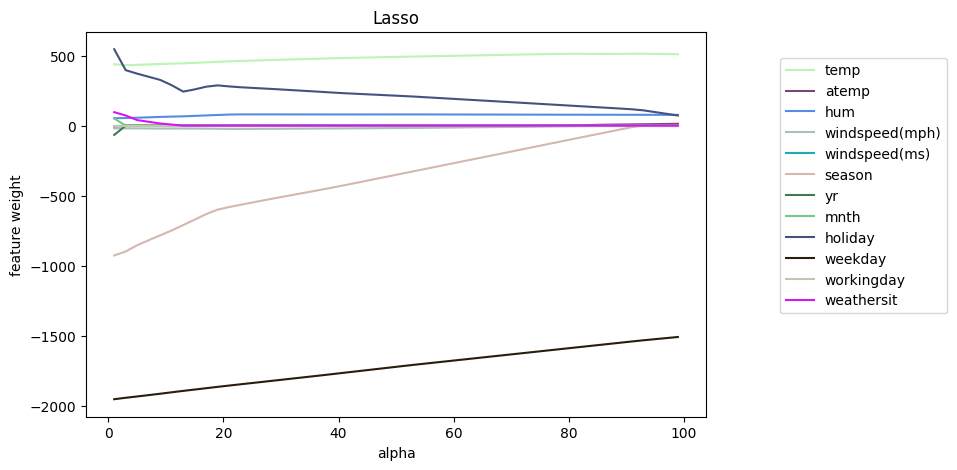

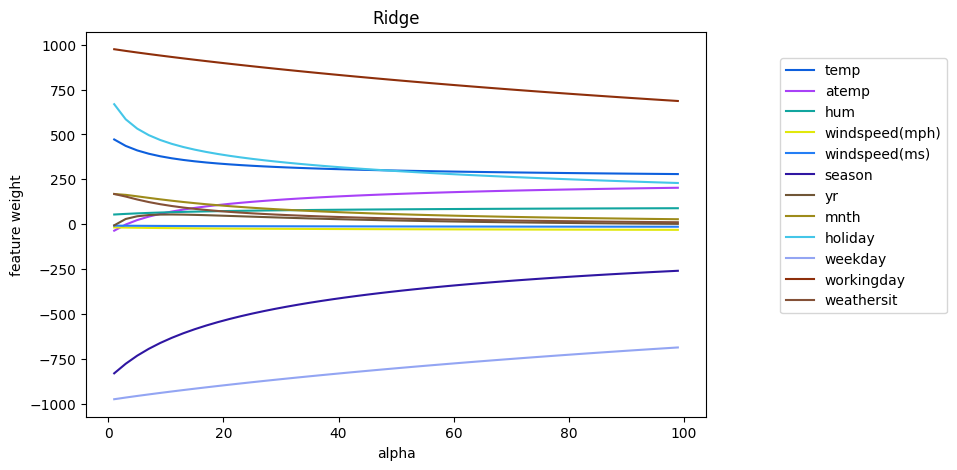

In [22]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

Картинки вышли красивыми. Обратите внимание, что регуляризатор Lasso агрессивнее уменьшает веса. Подумайте с чем это связано. Если делать `alpha` очень большим, веса зануляются. В случае Ridge такого не происходит. Веса становятся всё ближе к нулю, но зануления не происходит.  Из-за того, что Lasso зануляет некоторые признаки, его можно использовать для отбора самых важных признаков. Дальше будем работать именно с ним.

Итак, мы видим, что при изменении `alpha` модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее `alpha`. Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть MSE (Mean Square Error).

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать `alpha` по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую, то настроимся на конкретные "новые" данные, и вновь можем переобучиться.

Именно такую настройку вы наблюдали выше, когда запускали код с наивным прогнозом много раз подряд. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения `alpha`, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на $K$ частей, или блоков, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку.

Подбирать параметр `alpha` в `sklearn` совсем просто: для этого есть `GridSearchCV`. Мы уже сталкивались с примером применения этой функции на семинаре. Попробуйте с помощью неё перебрать список из альф и подыскать оптимальное. Параметр cv отвечает за то, на сколько частей делится выборка. Поставьте `cv=5`. Также укажите параметр `scoring = neg_mean_squared_error`. Это задаст функцию потерь, на которую будет ориентироваться `GridSearchCV` при переборе. Назовите переменную, в которой будет находиться перебор __grid_cv_lasso.__

__в) [2 балла]__ Подберите для Lasso-регрессии с помощью поиска по решётке оптимальное значение $\alpha$.  Каким оказалось это значение?



In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

alphas = np.arange(0.5, 50, 0.5)

grid_search_lasso = GridSearchCV(Lasso(max_iter=50000), {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')

grid_search_lasso.fit(X_train, y_train)

optimal_alpha = grid_search_lasso.best_params_['alpha']

print("Оптимальное значение alpha:", optimal_alpha)

Оптимальное значение alpha: 3.5


__г) [2 балла]__ Каким получается качество прогноза для модели с оптимальным значением $\alpha$?

In [24]:
from sklearn.linear_model import Lasso

lasso_reg_model = Lasso(alpha=optimal_alpha, max_iter=50000)
lasso_reg_model.fit(X_train, y_train)

y_test_pred_lasso = lasso_reg_model.predict(X_test)

rmse_lasso = rmse(y_test, y_test_pred_lasso)

print("RMSE для Lasso-регрессии:", rmse_lasso)

RMSE для Lasso-регрессии: 805.9407669666648


__д) [2 балла]__ Наконец, как принято в анализе данных, давайте проинтерпретируем результат. Проинтерпретируйте последнюю обученую модель. У каких признаков наибольшие положительные коэфициенты? У каких наибольшие отрицательные? Логично ли утверждать, что чем больще/меньше эти признаки, тем выше/ниже спрос на велосипеды? Какие коэффициенты занулились?

In [25]:
coefficients_lasso = grid_search_lasso.best_estimator_.coef_
coefficients_lasso_df = pd.DataFrame({'Признак': X.columns, 'Коэффициент': coefficients_lasso})
coefficients_lasso_df

,Признак,Коэффициент
0,temp,432.134
1,atemp,0.000
2,hum,54.639
3,windspeed(mph),-19.459
4,windspeed(ms),-0.000
5,season_1,-885.604
6,season_2,-0.000
7,season_3,0.000
8,season_4,389.328
9,yr_0,-1941.952


In [26]:
positive_coefficients_df = coefficients_lasso_df[coefficients_lasso_df['Коэффициент'] > 0]
negative_coefficients_df = coefficients_lasso_df[coefficients_lasso_df['Коэффициент'] < 0]
positive_coefficients_df = positive_coefficients_df.sort_values(by='Коэффициент', ascending=False)
negative_coefficients_df = negative_coefficients_df.sort_values(by='Коэффициент', ascending=True)
positive_coefficients_df.head(5)

,Признак,Коэффициент
0,temp,432.134
19,mnth_9,394.283
8,season_4,389.328
34,weathersit_1,388.575
31,weekday_6,180.420


In [27]:
negative_coefficients_df.head(5)

,Признак,Коэффициент
9,yr_0,-1941.952
5,season_1,-885.604
36,weathersit_3,-867.728
21,mnth_11,-389.791
22,mnth_12,-328.149


In [28]:
zero_coefficients_df = coefficients_lasso_df[abs(coefficients_lasso_df['Коэффициент']) == 0]
zero_coefficients_df

,Признак,Коэффициент
1,atemp,0.000
4,windspeed(ms),-0.000
6,season_2,-0.000
7,season_3,0.000
15,mnth_5,0.000
16,mnth_6,0.000
20,mnth_10,-0.000
23,holiday_0,0.000
24,holiday_1,-0.000
27,weekday_2,-0.000


__Ответ:__  про многие коэффициеннты нельзя утверждать, что если увеличить признак, то спрос на велики вырастет/упадет, так как это категоральные переменные. 

__е) [2 балла]__ В прошлой домашке, когда мы придумывали фичи, мы предположили, что спрос на велосипеды зависит от скорости ветра квадратично, по параболе. Подтвердилось ли это предположение?

__Ответ:__  Лучшее значение для спроса равно -9. И если подумать, то чем больше скорость ветра, тем ниже спрос (при положительных). А значит квадратичной зависимости нет.

In [29]:
wind_coefficients = coefficients_lasso_df.loc[coefficients_lasso_df['Признак'].isin(['windspeed(mph)', 'windspeed(mph)_squared', 'windspeed(ms)', 'windspeed(ms)_squared'])]

wind_coefficients


,Признак,Коэффициент
3,windspeed(mph),-19.459
4,windspeed(ms),-0.000
40,windspeed(mph)_squared,-1.031
41,windspeed(ms)_squared,-0.000
